In [11]:
#Подгружаем библиотеки
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize']=(12,8)
%matplotlib inline
sns.set()



from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from pandas.plotting import scatter_matrix
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn import svm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors

In [12]:
#Подгружаем данные
m_data = pd.read_csv('data_reprocessed.csv')
m_data.head()

,Unnamed: 0,Название,Год,Топливо,Объем двигателя,Мощность,Коробка передач,Привод,Цвет,Пробег,...,передний,бензин,дизель,электро,автомат,вариатор,механика,робот,левый,правый
0,0,Kia Mohave,2020,дизель,3.0,260.0,автомат,4WD,серый,26000.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,Hyundai Santa Fe,2018,дизель,2.2,200.0,автомат,4WD,серый,81000.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,Toyota RAV4,2022,бензин,2.0,173.0,вариатор,4WD,черный,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,3,Jeep Gladiator,2020,бензин,3.6,285.0,автомат,4WD,черный,15000.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,Jeep Wrangler,2018,бензин,2.0,272.0,автомат,4WD,черный,37700.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [13]:
numeric=['Год', 'Объем двигателя', 'Мощность', 'Пробег']

In [14]:
X = m_data[numeric]
y = m_data['Цена']

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression # подгрузили модель
scaler = MinMaxScaler()
df_scaled_train = pd.DataFrame(scaler.fit_transform(X), columns=numeric,index=X.index)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled_train, y, test_size=0.2, random_state=42, shuffle=True)

In [17]:
X_train

,Год,Объем двигателя,Мощность,Пробег
243,0.972603,0.246154,0.102122,0.049765
1216,0.931507,0.384615,0.179045,0.201455
643,0.876712,0.307692,0.183024,0.229110
744,0.917808,0.861538,0.476127,0.265055
1299,0.739726,0.246154,0.068966,0.418296
...,...,...,...,...
1095,0.794521,0.276923,0.151194,0.324987
1130,0.958904,0.307692,0.136605,0.101236
1294,0.945205,0.246154,0.102122,0.106867
860,0.972603,0.461538,0.279841,0.085187


In [24]:
# Посчитаем метрики регрессии
from sklearn import metrics  # подгружаем метрики

def print_metrics(predicted, y_test):
    print('MAE:', "%.4f" % metrics.mean_absolute_error( predicted, y_test)) #Средняя абсолютная ошибка, MAE
    print('RMSE:', "%.4f" % np.sqrt(metrics.mean_squared_error(predicted, y_test))) #Средняя квадратичная ошибка, RMSE
    print('MAPE:', "%.4f" % metrics.mean_absolute_percentage_error(predicted, y_test)) #Средняя абсолютная процентная ошибка, MAPE

In [51]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth = 5, min_samples_split=0.1)
print('Decision Tree')
model.fit(X_train,y_train)
predicted = model.predict(X_test)
print('метрики')
print_metrics(y_test, predicted)
print('')
print('Test Score: ',metrics.mean_squared_error(y_test,predicted))
predicted = model.predict(X_train)
print_metrics(y_train, predicted)
print('Train Score: ',metrics.mean_squared_error(y_train,predicted))

Decision Tree
метрики
MAE: 1069473.2180
RMSE: 2156379.3430
MAPE: 0.4729

Test Score:  4649971870950.092
MAE: 1072292.1572
RMSE: 2351057.2461
MAPE: 0.4305
Train Score:  5527470174446.3955


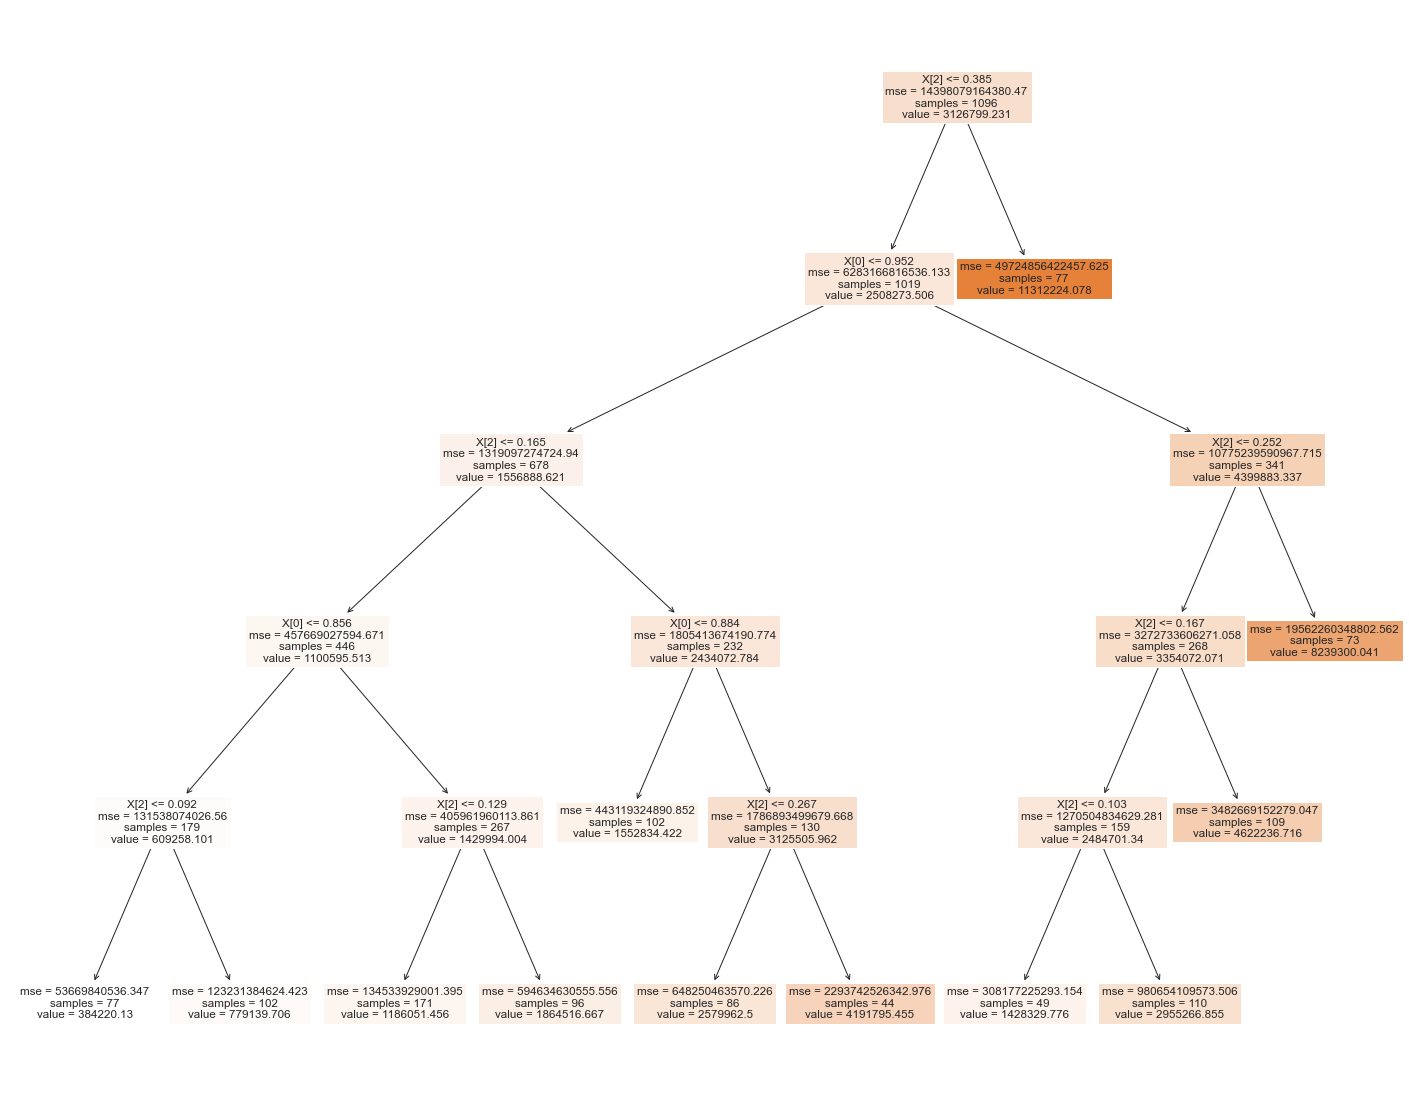

In [55]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   filled=True)
fig.savefig("decistion_tree.png")

In [49]:
# Random Forest
model = RandomForestRegressor(n_estimators = 300, max_depth=7, min_samples_leaf=0.1, min_samples_split=0.3)
print('Random Forest')
model.fit(X_train,y_train)
predicted = model.predict(X_test)
print('метрики')
print_metrics(y_test, predicted)
print('')
print('Test Score: ',metrics.mean_squared_error(y_test,predicted))
predicted = model.predict(X_train)
print('Train Score: ',metrics.mean_squared_error(y_train,predicted))

Random Forest
метрики
MAE: 1418631.0895
RMSE: 2605073.8150
MAPE: 0.7861

Test Score:  6786409581540.967
Train Score:  8702858594536.699


In [50]:
print_metrics(y_train, predicted) 

MAE: 1493968.9713
RMSE: 2950060.7781
MAPE: 0.7881


In [29]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
print('Boosting')
model.fit(X_train,y_train)
predicted = model.predict(X_test)
print('метрики')
print_metrics(y_test, predicted)
print('')
print('Test Score: ',metrics.mean_squared_error(y_test,predicted))
predicted = model.predict(X_train)
print('Train Score: ',metrics.mean_squared_error(y_train,predicted))

Boosting
метрики
MAE: 791023.9096
RMSE: 1630064.2893
MAPE: 0.3107

Test Score:  2657109587124.939
Train Score:  989612975465.5034


In [21]:
model.feature_importances_

array([8.41520400e-02, 1.33851085e-04, 8.53458101e-01, 6.22560082e-02])

критерий мощности двигателя больше всего влияет